<a href="https://colab.research.google.com/github/GasKitela/ia-utn/blob/main/Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subida del zip

In [ ]:
from google.colab import files
import zipfile
import io


uploaded = files.upload()

data = zipfile.ZipFile(io.BytesIO(uploaded['Evoluciones_Agumon.zip']), 'r')
data.extractall()


Saving Evoluciones_Agumon.zip to Evoluciones_Agumon.zip


Lectura de los datos, entrenamiento del modelo y prediccion

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Elementos agumon 21
Elementos greymon 26
Elementos metalgreymon 21
Elementos wargreymon 26


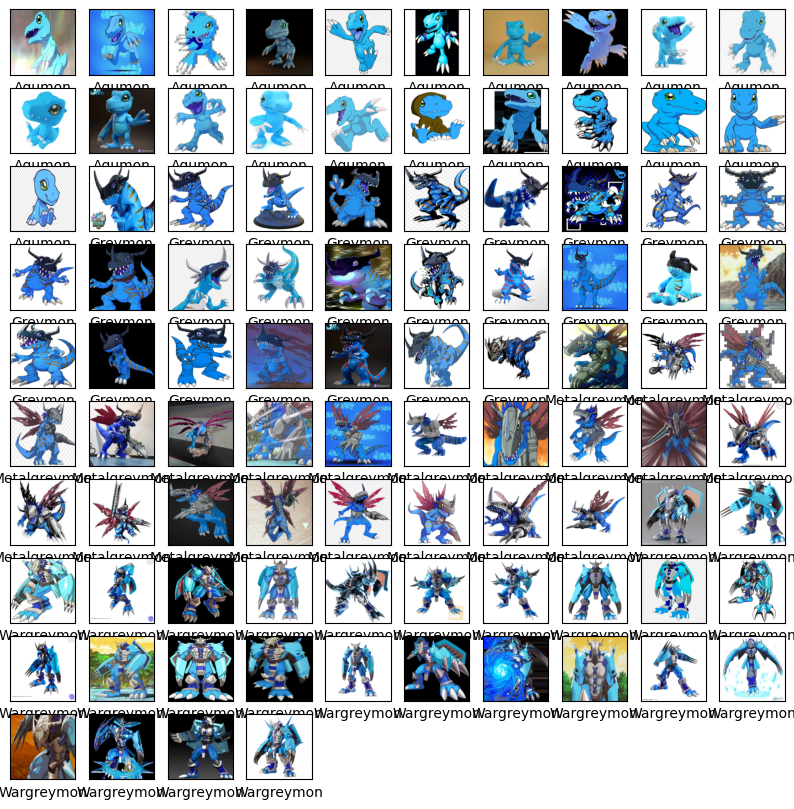

Epoch 1/92
3/3 [==============================] - 1s 166ms/step - loss: 22786.3535 - accuracy: 0.2553
Epoch 2/92
3/3 [==============================] - 0s 159ms/step - loss: 47653.4883 - accuracy: 0.2766
Epoch 3/92
3/3 [==============================] - 0s 161ms/step - loss: 13110.8008 - accuracy: 0.2553
Epoch 4/92
3/3 [==============================] - 0s 165ms/step - loss: 4529.1270 - accuracy: 0.3298
Epoch 5/92
3/3 [==============================] - 1s 230ms/step - loss: 4385.3223 - accuracy: 0.3830
Epoch 6/92
3/3 [==============================] - 1s 251ms/step - loss: 4432.1372 - accuracy: 0.3191
Epoch 7/92
3/3 [==============================] - 1s 255ms/step - loss: 3505.2627 - accuracy: 0.3617
Epoch 8/92
3/3 [==============================] - 1s 259ms/step - loss: 2393.3521 - accuracy: 0.4149
Epoch 9/92
3/3 [==============================] - 1s 184ms/step - loss: 1368.6548 - accuracy: 0.4468
Epoch 10/92
3/3 [==============================] - 0s 156ms/step - loss: 559.9075 - accu

Saving prediccion.jpg to prediccion.jpg
1/1 [==============================] - 0s 26ms/step
La clasificación predecida es Wargreymon


In [14]:
from google.colab import files
import zipfile
import io
import cv2 #reconocimiento de imagenes en py
import numpy as np #arrays
import os
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import keras.optimizers as Optimizer


try: 
  %tensorflow_version 2.x
except Exception: 
  pass

ruta_agumon="/content/Evoluciones_Agumon/Agumon"
ruta_greymon="/content/Evoluciones_Agumon/Greymon"
ruta_metalgreymon="/content/Evoluciones_Agumon/Metalgreymon"
ruta_wargreymon="/content/Evoluciones_Agumon/Wargreymon"

agumon=[]
greymon=[]
metalgreymon=[]
wargreymon=[]
img_size=150

for img in os.listdir(ruta_agumon):
  if('jpg' in img):
    img = cv2.imread(os.path.join(ruta_agumon, img))
    img_resize = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_AREA)
    agumon.append(img_resize)

print("Elementos agumon", len(agumon))

for img in os.listdir(ruta_greymon):
  if('jpg' in img):
    img = cv2.imread(os.path.join(ruta_greymon, img))
    img_resize = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_AREA)
    greymon.append(img_resize)

print("Elementos greymon", len(greymon))

for img in os.listdir(ruta_metalgreymon):
  if('jpg' in img):
    img = cv2.imread(os.path.join(ruta_metalgreymon, img))
    img_resize = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_AREA)
    metalgreymon.append(img_resize)

print("Elementos metalgreymon", len(metalgreymon))

for img in os.listdir(ruta_wargreymon):
  if('jpg' in img):
    img = cv2.imread(os.path.join(ruta_wargreymon, img))
    img_resize = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_AREA)
    wargreymon.append(img_resize)

print("Elementos wargreymon", len(wargreymon))

Agumon = np.array(agumon)
Greymon = np.array(greymon)
Metalgreymon = np.array(metalgreymon)
Wargreymon = np.array(wargreymon)

#juntar imagenes
imagenes2 = np.concatenate([Agumon, Greymon])
imagenes1 = np.concatenate([imagenes2, Metalgreymon])
imagenes = np.concatenate([imagenes1, Wargreymon])

Imagenes = np.array(imagenes)

etiquetas_agumon = np.repeat(0,21)
etiquetas_greymon = np.repeat(1,26)
etiquetas_metalgreymon = np.repeat(2,21)
etiquetas_wargreymon = np.repeat(3,26)

labels2 = np.concatenate([etiquetas_agumon, etiquetas_greymon])
labels1 = np.concatenate([labels2, etiquetas_metalgreymon])
labels = np.concatenate([labels1, etiquetas_wargreymon])

Labels = np.array(labels)

clases = ['Agumon', 'Greymon', 'Metalgreymon', 'Wargreymon']

plt.figure(figsize=(10,10))

for i in range(94):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img = Imagenes[i]
  plt.imshow(img)
  plt.xlabel(clases[Labels[i]])

plt.show()

## hasta aca etiquetas

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(Imagenes, Labels, test_size=0.2, random_state=42)

trained = model.fit(Imagenes, Labels, epochs=92)

######################################################################################

# Obtener las predicciones en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("y_pred_classes: ", y_pred_classes)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_classes)

# Calcular la precisión, recuperación y otras métricas
report = classification_report(y_test, y_pred_classes, target_names=clases)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(cm)

# Mostrar la exactitud
print("Exactitud:", accuracy)

# Mostrar las métricas
print("Métricas de clasificación:")
print(report)

######################################################################################

print("Cargar imagen prediccion.jpg para clasificar:")
uploaded = files.upload()

img = cv2.imread("/content/prediccion.jpg")
img_resize = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_AREA)
imagen_pred = np.expand_dims(img_resize, 0)

prediction = model.predict(imagen_pred)

threshold = 0.5  # Umbral mínimo de probabilidad

max_probability = np.max(prediction)
predicted_class = np.argmax(prediction)

if max_probability < threshold:
    print("La imagen no se ajusta a ninguna clasificación.")
else:
    print("La clasificación predecida es", clases[predicted_class])
    

